In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os

%matplotlib inline
%config InlineBackend.figure_format='retina'

<span style="color: blue;"> Accessing the netCDF data from the shared folder for Satellites for GeoHealth Course and making it accessible in the current projects **00_Data** folder. If the data is stored elsewhere, then only by updating the **datadir** variable, all the outputs can be reproducible.
</span>

In [2]:
data_dir = "../00_Data/ERA5_2mTemp_19900101-19900531_00h.nc"

In [4]:
ds = xr.open_dataset(data_dir)

In [83]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 151)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 1990-05-31
Data variables:
    t2m        (time, latitude, longitude) float32 245.2 245.2 ... 213.1 213.1

# Task 01

### <span style="color: blue;"> 1 Checking the Data Coverage by investigating the min and max of Coordinates </span>

In [33]:
float(ds.coords["longitude"].min()), float(ds.coords["longitude"].max())

(0.0, 359.75)

In [34]:
float(ds.coords["latitude"].min()), float(ds.coords["latitude"].max())

(-90.0, 90.0)

In [36]:
str(ds.coords["time"].min()), str(ds.coords["time"].max())

("<xarray.DataArray 'time' ()>\narray('1990-01-01T00:00:00.000000000', dtype='datetime64[ns]')\nCoordinates:\n    expver   int32 1",
 "<xarray.DataArray 'time' ()>\narray('1990-05-31T00:00:00.000000000', dtype='datetime64[ns]')\nCoordinates:\n    expver   int32 1")

### <span style="color: blue;"> 2 Data Slicing with Time & Plotting the Data </span>
Our desired timestamp is **1990 January 1st**.

In [54]:
ds.t2m.time.data[:20]

array(['1990-01-01T00:00:00.000000000', '1990-01-02T00:00:00.000000000',
       '1990-01-03T00:00:00.000000000', '1990-01-04T00:00:00.000000000',
       '1990-01-05T00:00:00.000000000', '1990-01-06T00:00:00.000000000',
       '1990-01-07T00:00:00.000000000', '1990-01-08T00:00:00.000000000',
       '1990-01-09T00:00:00.000000000', '1990-01-10T00:00:00.000000000',
       '1990-01-11T00:00:00.000000000', '1990-01-12T00:00:00.000000000',
       '1990-01-13T00:00:00.000000000', '1990-01-14T00:00:00.000000000',
       '1990-01-15T00:00:00.000000000', '1990-01-16T00:00:00.000000000',
       '1990-01-17T00:00:00.000000000', '1990-01-18T00:00:00.000000000',
       '1990-01-19T00:00:00.000000000', '1990-01-20T00:00:00.000000000'],
      dtype='datetime64[ns]')

<span style="color: blue;"> As we can see, our desired timestamp is 1990 January 1st is the first value of the time coordinate. We need to perform a slice operation with [**xarray.Dataset.isel**](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.isel.html) on the time coordinate only to parse all other data associated with 1st January 1990 timestamp. </span>

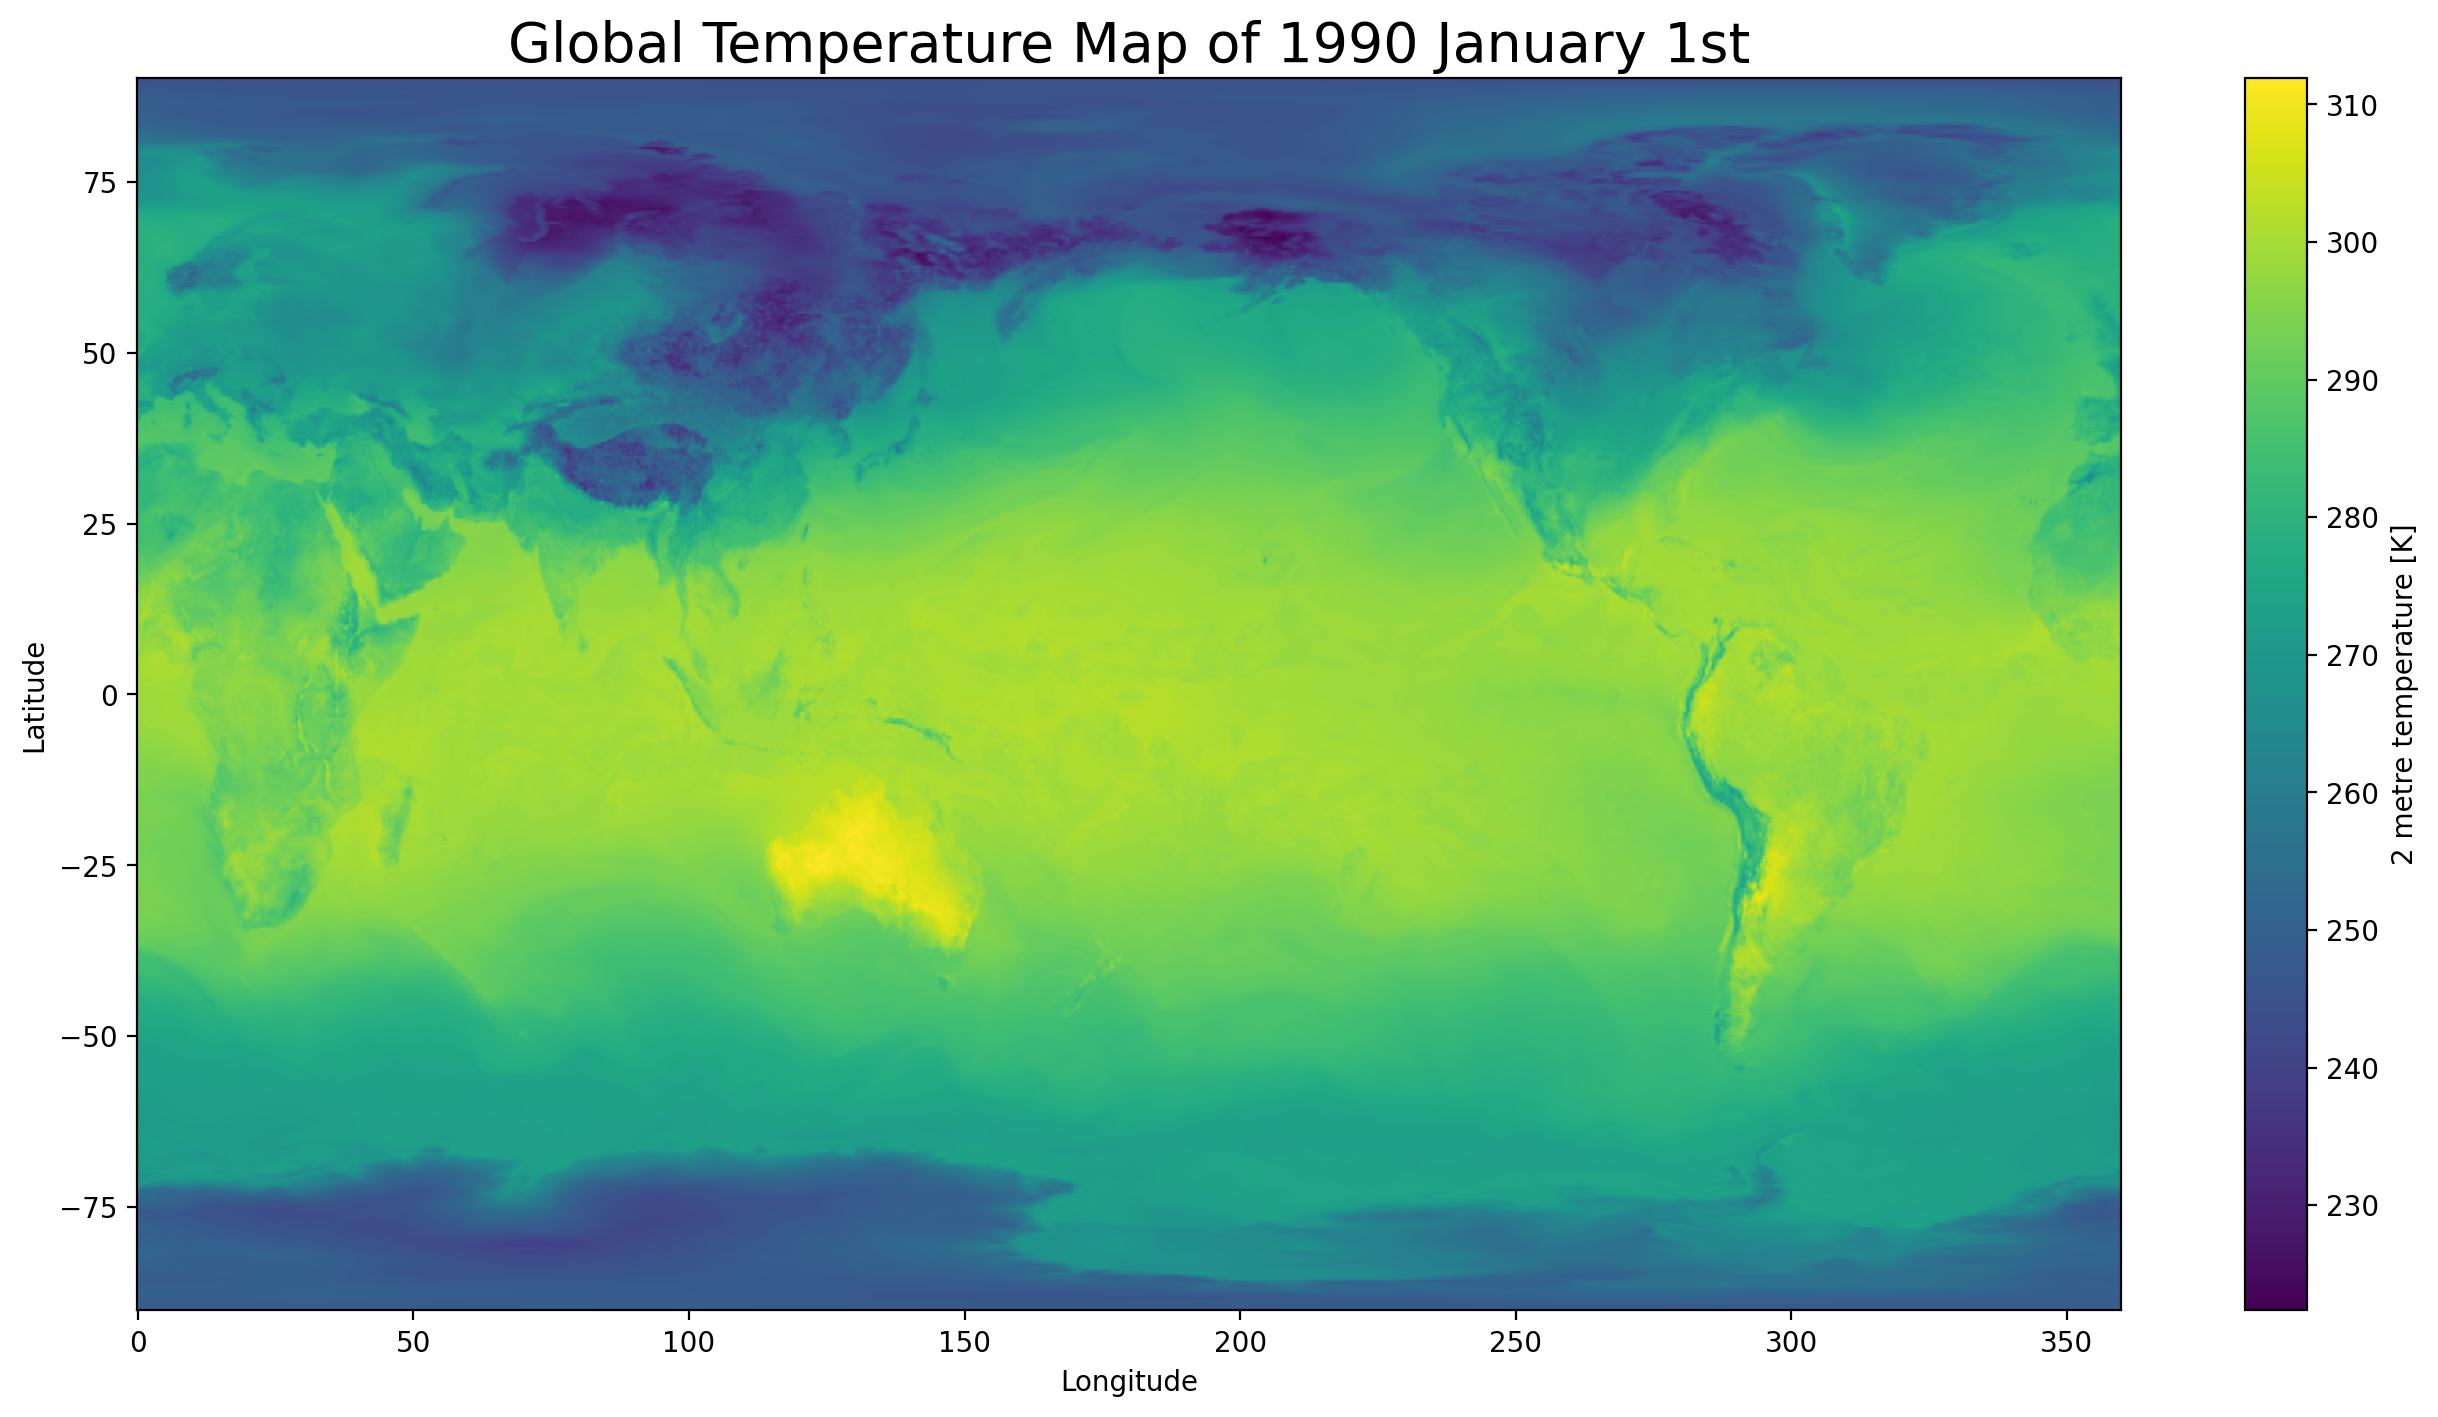

In [90]:
fig, ax = plt.subplots(figsize=(16, 8))

ds.t2m.isel(time=0).plot(x="longitude", ax=ax)

# Setting title and axis labels
ax.set_title("Global Temperature Map of 1990 January 1st", fontsize=20)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.savefig("../02_Outputs/T1_Global Temperature Map of 1990 January 1st.png")

plt.show()